# Imports

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AI/micro
!ls

Mounted at /content/drive
/content/drive/MyDrive/AI/micro
 128ps1.zip	  data		        submit
 256ps1.zip	  datagenerator.py      train_dataset_mc.zip
 256ps2.zip	  dataset.py	        train_ext.zip
 256pstest.zip	  default.zip	        train_functions.py
 256.zip	  eye_test	        Training.ipynb
 512ps1.zip	  ez.zip	        train_test.zip
 512ps2.zip	  __MACOSX	        utils
 512pstest.zip	  masks.zip	        weights
 768ps1.zip	  modeling	        with_masks.zip
 768.zip	  __pycache__	       'И≠≠ЃҐ†ж®®_ДВ_гбЂЃҐ®•_І†§†з®.pdf'
 baseline.ipynb   sample_solution      'Копия Training.ipynb'
 configs	  sample_solution.zip   Микроциркуляция.zip


In [5]:
 #!g1.1
# Помощь в визуализации
%matplotlib inline
from IPython.display import clear_output
from tqdm.notebook import tqdm, trange
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.simplefilter("ignore", UserWarning)

# Базовые библиотеки
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import glob
from PIL import Image
import cv2
# Аугментации
!pip install -qqq albumentations
import albumentations as A

# Torch
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
!pip install segmentation_models_pytorch -qqq
import segmentation_models_pytorch as smp

# Красивые графики
!pip install wandb -qqq
import wandb

print('Ready to work')

     |████████████████████████████████| 97 kB 4.0 MB/s 
     |████████████████████████████████| 58 kB 6.0 MB/s 
     |████████████████████████████████| 376 kB 41.6 MB/s 
     |████████████████████████████████| 1.8 MB 5.0 MB/s 
     |████████████████████████████████| 181 kB 74.5 MB/s 
     |████████████████████████████████| 162 kB 69.8 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 158 kB 66.6 MB/s 
     |████████████████████████████████| 157 kB 81.0 MB/s 
     |████████████████████████████████| 157 kB 77.1 MB/s 
     |████████████████████████████████| 157 kB 60.3 MB/s 
     |████████████████████████████████| 157 kB 78.6 MB/s 
     |████████████████████████████████| 157 kB 76.8 MB/s 
     |████████████████████████████████| 157 kB 51.4 MB/s 
     |████████████████████████████████| 157 kB 61.0 MB/s 
     |████████████████████████████████| 156 kB 80.3 MB/s 
Ready to work


## Downloads

In [ ]:
### SAVE CURRENT TRAIN_EXT/ ###
%cd /content/masks/
!zip masks.zip *
!du -sh masks.zip
!mv masks.zip /content/masks.zip
%cd /content/drive/MyDrive/AI/micro
!mv /content/masks.zip ./masks.zip

In [ ]:
### SAVE CURRENT TRAIN_EXT/ ###
%cd /content/train_ext/
!zip 512pstest.zip *
!du -sh 512pstest.zip
!mv 512pstest.zip /content/512pstest.zip
%cd /content/drive/MyDrive/AI/micro
!mv /content/512pstest.zip ./512pstest.zip

In [ ]:
### EXTRACT SAVED TRAIN_EXT ###
!rm -rf /content/masks/
!mkdir /content/masks/
!unzip masks.zip -d /content/masks/

In [6]:
### EXTRACT SAVED TRAIN_EXT ###
!rm -rf /content/train_ext/
!mkdir /content/train_ext/
!unzip 512pstest.zip -d /content/train_ext/

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /content/train_ext/219_5_mask.jpg  
  inflating: /content/train_ext/219_5.png  
  inflating: /content/train_ext/219_6_mask.jpg  
  inflating: /content/train_ext/219_6.png  
  inflating: /content/train_ext/2_1_mask.jpg  
  inflating: /content/train_ext/2_1.png  
  inflating: /content/train_ext/220_5_mask.jpg  
  inflating: /content/train_ext/220_5.png  
  inflating: /content/train_ext/220_6_mask.jpg  
  inflating: /content/train_ext/220_6.png  
  inflating: /content/train_ext/220_9_mask.jpg  
  inflating: /content/train_ext/220_9.png  
  inflating: /content/train_ext/22_0_mask.jpg  
  inflating: /content/train_ext/22_0.png  
  inflating: /content/train_ext/22_1_mask.jpg  
  inflating: /content/train_ext/22_1.png  
  inflating: /content/train_ext/222_10_mask.jpg  
  inflating: /content/train_ext/222_10.png  
  inflating: /content/train_ext/222_1_mask.jpg  
  inflating: /content/train_ext/222_1.png  
  inflat

In [ ]:
!ls /content/train_ext/ | wc -l

17142


In [ ]:
### TRAIN ###
!rm -rf /content/train/
!mkdir /content/train/
!unzip ez.zip -d /content/train/

In [ ]:
!ls /content/train/images | wc -l

ls: cannot access '/content/train/images': No such file or directory
0


In [17]:
### TRAIN ###
!rm -rf /content/train/
!mkdir /content/train/
!unzip train_dataset_mc.zip -d /content/train/

Archive:  train_dataset_mc.zip
  inflating: /content/train/1.geojson  
  inflating: /content/train/__MACOSX/._1.geojson  
  inflating: /content/train/1.png    
  inflating: /content/train/__MACOSX/._1.png  
  inflating: /content/train/2.geojson  
  inflating: /content/train/__MACOSX/._2.geojson  
  inflating: /content/train/2.png    
  inflating: /content/train/__MACOSX/._2.png  
  inflating: /content/train/3.geojson  
  inflating: /content/train/__MACOSX/._3.geojson  
  inflating: /content/train/3.png    
  inflating: /content/train/__MACOSX/._3.png  
  inflating: /content/train/4.geojson  
  inflating: /content/train/__MACOSX/._4.geojson  
  inflating: /content/train/4.png    
  inflating: /content/train/__MACOSX/._4.png  
  inflating: /content/train/5.geojson  
  inflating: /content/train/__MACOSX/._5.geojson  
  inflating: /content/train/5.png    
  inflating: /content/train/__MACOSX/._5.png  
  inflating: /content/train/6.geojson  
  inflating: /content/train/__MACOSX/._6.geojson 

In [ ]:
!wget https://lodmedia.hb.bizmrg.com/case_files/815459/train_dataset_mc.zip

--2022-09-25 10:26:47--  https://lodmedia.hb.bizmrg.com/case_files/815459/train_dataset_mc.zip
Resolving lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)... 217.69.142.100
Connecting to lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)|217.69.142.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1991848268 (1.9G) [application/zip]
Saving to: ‘train_dataset_mc.zip’

train_dataset_mc.zi 100%[===================>]   1.85G  16.7MB/s    in 40m 36s 

2022-09-25 11:07:24 (798 KB/s) - ‘train_dataset_mc.zip’ saved [1991848268/1991848268]



# Make patches

In [37]:
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset
import glob
import json


class PatchEyeDataset(Dataset):
    """
    Класс датасета, организующий загрузку и получение изображений и соответствующих разметок
    """

    def __init__(self, paths: str, transform = None):
        self.class_ids = {"vessel": 1}

        self.paths = paths
        self.transform = transform

    @staticmethod
    def read_image(path: str) -> np.ndarray:
        image = cv2.imread(str(path), cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = np.array(image / 255, dtype=np.float32)
        return image

    def __getitem__(self, idx: int) -> dict:
        image_path = self.paths[idx]
        mask_path = image_path.replace('train', 'masks')

        image = self.read_image(image_path)
        mask = self.read_image(mask_path)

        sample = {'image': image,
                  'mask': mask}

        if self.transform is not None:
            sample = self.transform(**sample)

        image = sample['image']
        mask = sample['mask']

        image = np.transpose(image, (2, 0, 1))
        image = torch.from_numpy(np.array(image, dtype=np.float))
        image = image.type(torch.FloatTensor)
        mask = np.expand_dims(mask[:, :, 0], axis=-1)
        mask = np.transpose(mask, (2, 0, 1))
        mask = torch.from_numpy(np.array(mask, dtype=np.uint8))
        return image, mask

    def __len__(self):
        return len(self.paths)

orig_paths = glob.glob(f"/content/train/*.png")
orig_paths = [x for x in orig_paths if os.path.exists(x.replace('train', 'masks'))]
dataset = PatchEyeDataset(orig_paths)
len(dataset)

951

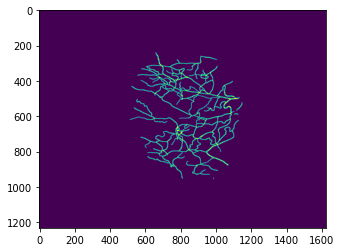

In [31]:
plt.imshow(dataset[11][1].squeeze(0).numpy())

In [ ]:
from utils import EyeDataset
orig_paths = glob.glob(f"data/*.png")
orig_paths = [os.path.join('/content/train/', x.split('/')[-1]) for x in orig_paths]
dataset = EyeDataset(orig_paths)
len(dataset)

650

In [38]:
!rm -rf /content/train_ext/
!mkdir /content/train_ext/

In [39]:
from modeling import Cutter
import skimage

def is_enough_presentable(image, threshold=0.3):
    """
    Filter image by histogram value
    :param image: image to check
    :param threshold: threshold of filtering [0..1]
    :return: boolean value is image enough presentable or not
    """
    grayscale = skimage.color.rgb2gray(image)

    histogram, bin_edges = np.histogram(grayscale, bins=256, range=(0.0, 1.0))
    
    if np.sum(histogram[30:]) / np.sum(histogram) >= threshold:
        return True
    return False

cutter = Cutter(kernel_size=(512, 512), stride=(512, 512))

for i in tqdm(range(len(orig_paths))):
    img = dataset[i][0].permute(1, 2, 0)
    mask = dataset[i][1]
    mask = torch.unsqueeze(mask, dim=0)
    mask = torch.cat([mask, mask, mask], dim=0)
    mask = mask[:, 0, :, :].permute(1, 2, 0)

    img_num = orig_paths[i].split('/')[-1].split('.')[0]
    img_patches = cutter.split(img)
    mask_patches = cutter.split(mask)

    for idx in range(len(img_patches)):
        np_img = img_patches[idx].permute(1, 2, 0).numpy()
        np_img = np.array(np_img * 255, dtype=np.uint8)
        if is_enough_presentable(np_img, threshold=0.3):
            im = Image.fromarray(np_img)
            im.save(f"/content/train_ext/{img_num}_{idx}.png")

            np_mask = mask_patches[idx].permute(1, 2, 0).numpy() * 255
            msk = Image.fromarray(np_mask)
            msk.save(f"/content/train_ext/{img_num}_{idx}_mask.jpg")

100%|██████████| 951/951 [14:33<00:00,  1.09it/s]


In [40]:
!ls /content/train_ext/ | wc -l

6526


# Config

In [ ]:

norm_paths = ['348.png', '412.png', '360.png', '406.png', '638.png', '88.png', '610.png', '604.png', '189.png', '77.png', '63.png', '758.png', '764.png', '770.png', '228.png', '566.png', '200.png', '572.png', '599.png', '598.png', '215.png', '573.png', '567.png', '201.png', '229.png', '771.png', '765.png', '759.png', '62.png', '188.png', '76.png', '605.png', '163.png', '177.png', '639.png', '361.png', '407.png', '413.png', '375.png', '439.png', '405.png', '363.png', '411.png', '161.png', '607.png', '613.png', '175.png', '60.png', '74.png', '48.png', '773.png', '767.png', '559.png', '571.png', '217.png', '564.png', '570.png', '216.png', '558.png', '766.png', '772.png', '75.png', '61.png', '612.png', '160.png', '606.png', '148.png', '410.png', '404.png', '362.png', '438.png', '366.png', '400.png', '414.png', '399.png', '602.png', '164.png', '170.png', '158.png', '59.png', '65.png', '71.png', '776.png', '762.png', '212.png', '.DS_Store', '560.png', '206.png', '548.png', '549.png', '561.png', '213.png', '575.png', '763.png', '777.png', '70.png', '64.png', '58.png', '159.png', '603.png', '165.png', '398.png', '429.png', '401.png', '371.png', '417.png', '365.png', '359.png', '615.png', '167.png', '601.png', '99.png', '629.png', '8.png', '198.png', '66.png', '761.png', '775.png', '205.png', '563.png', '577.png', '211.png', '588.png', '589.png', '238.png', '576.png', '210.png', '204.png', '562.png', '748.png', '774.png', '760.png', '199.png', '67.png', '73.png', '9.png', '628.png', '166.png', '98.png', '614.png', '364.png', '370.png', '416.png', '459.png', '317.png', '465.png', '303.png', '129.png', '115.png', '101.png', '667.png', '14.png', '698.png', '707.png', '713.png', '539.png', '263.png', '289.png', '510.png', '504.png', '538.png', '100.png', '114.png', '128.png', '464.png', '302.png', '316.png', '458.png', '328.png', '466.png', '472.png', '314.png', '499.png', '664.png', '116.png', '670.png', '17.png', '738.png', '710.png', '704.png', '274.png', '512.png', '506.png', '260.png', '523 .png', '507.png', '275.png', '513.png', '705.png', '739.png', '671.png', '103.png', '659.png', '498.png', '473.png', '315.png', '467.png', '329.png', '305.png', '311.png', '477.png', '339.png', '488.png', '107.png', '661.png', '675.png', '649.png', '715.png', '701.png', '517.png', '265.png', '503.png', '259.png', '264.png', '502.png', '516.png', '270.png', '728.png', '700.png', '714.png', '648.png', '106.png', '660.png', '338.png', '310.png', '476.png', '462.png', '474.png', '312.png', '306.png', '460.png', '110.png', '676.png', '662.png', '138.png', '39.png', '689.png', '11.png', '702.png', '500.png', '266.png', '272.png', '514.png', '528.png', '298.png', '529.png', '515.png', '501.png', '267.png', '717.png', '703.png', '38.png', '105.png', '111.png', '677.png', '449.png', '307.png', '461.png', '475.png', '313.png', '478.png', '336.png', '450.png', '444.png', '322.png', '108.png', '652.png', '120.png', '646.png', '21.png', '691.png', '685.png', '726.png', '732.png', '518.png', '242.png', '524.png', '530.png', '256.png', '281.png', '295.png', '294.png', '531.png', '243.png', '519.png', '684.png', '20.png', '121.png', '653.png', '135.png', '109.png', '486.png', '492.png', '445.png', '323.png', '337.png', '451.png', '479.png', '309.png', '321.png', '447.png', '453.png', '335.png', '484.png', '679.png', '645.png', '123.png', '137.png', '22.png', '36.png', '686.png', '692.png', '719.png', '731.png', '725.png', '269.png', '533.png', '241.png', '296.png', '282.png', '297.png', '526.png', '240.png', '532.png', '268.png', '724.png', '687.png', '37.png', '23.png', '122.png', '485.png', '452.png', '334.png', '320.png', '446.png', '308.png', '324.png', '330.png', '456.png', '318.png', '495.png', '132.png', '27.png', '734.png', '720.png', '708.png', '536.png', '250.png', '244.png', '522.png', '278.png', '293.png', '287.png', '286.png', '537.png', '251.png', '709.png', '721.png', '735.png', '26.png', '682.png', '669.png', '655.png', '127.png', '641.png', '494.png', '480.png', '319.png', '331.png', '457.png', '443.png', '325.png', '455.png', '333.png', '327.png', '441.png', '496.png', '482.png', '657.png', '643.png', '125.png', '694.png', '680.png', '24.png', '723.png', '737.png', '521.png', '253.png', '509.png', '290.png', '291.png', '508.png', '252.png', '534.png', '520.png', '246.png', '722.png', '25.png', '31.png', '19.png', '681.png', '695.png', '118.png', '642.png', '124.png', '130.png', '656.png', '483.png', '497.png', '468.png', '326.png', '454.png', '332.png', '369.png', '433.png', '355.png', '341.png', '95.png', '81.png', '619.png', '157.png', '631.png', '625.png', '143.png', '4.png', '56.png', '42.png', '194.png', '180.png', '779.png', '745.png', '751.png', '209.png', '547.png', '235.png', '584.png', '590.png', '591.png', '546.png', '208.png', '750.png', '744.png', '778.png', '181.png', '43.png', '624.png', '142.png', '80.png', '383.png', '397.png', '340.png', '426.png', '432.png', '354.png', '368.png', '418.png', '424.png', '342.png', '356.png', '430.png', '381.png', '82.png', '96.png', '168.png', '140.png', '626.png', '41.png', '55.png', '7.png', '197.png', '752.png', '746.png', '578.png', '550.png', '544.png', '593.png', '587.png', '586.png', '223.png', '579.png', '747.png', '753.png', '68.png', '196.png', '182.png', '54.png', '633.png', '155.png', '141.png', '97.png', '169.png', '83.png', '394.png', '380.png', '357.png', '431.png', '425.png', '343.png', '435.png', '353.png', '409.png', '623.png', '145.png', '151.png', '637.png', '179.png', '78.png', '192.png', '44.png', '2.png', '50.png', '743.png', '780.png', '555.png', '541.png', '227.png', '569.png', '596.png', '582.png', '583.png', '597.png', '568.png', '540.png', '226.png', '232.png', '554.png', '742.png', '756.png', '3.png', '51.png', '45.png', '193.png', '92.png', '86.png', '178.png', '150.png', '636.png', '144.png', '385.png', '408.png', '434.png', '352.png', '346.png', '420.png', '350.png', '436.png', '344.png', '634.png', '152.png', '146.png', '90.png', '84.png', '191.png', '185.png', '53.png', '1.png', '740.png', '754.png', '768.png', '542.png', '556.png', '218.png', '581.png', '595.png', '594.png', '580.png', '219.png', '557.png', '225.png', '543.png', '782.png', '755.png', '741.png', '46.png', '52.png', '190.png', '85.png', '91.png', '609.png', '621.png', '635.png', '392.png', '423.png', '345.png', '351.png', '437.png']
norm_ids = [x.split('.')[0] for x in norm_paths]
for path in glob.glob('/content/train_ext/*.png'):
    if path.split('/')[-1].split('_')[0] not in norm_ids:
        print(path)
        break

/content/train_ext/171_0_mask.png


In [ ]:
### TEMP FIX ###
import shutil
import glob

norm_paths = ['348.png', '412.png', '360.png', '406.png', '638.png', '88.png', '610.png', '604.png', '189.png', '77.png', '63.png', '758.png', '764.png', '770.png', '228.png', '566.png', '200.png', '572.png', '599.png', '598.png', '215.png', '573.png', '567.png', '201.png', '229.png', '771.png', '765.png', '759.png', '62.png', '188.png', '76.png', '605.png', '163.png', '177.png', '639.png', '361.png', '407.png', '413.png', '375.png', '439.png', '405.png', '363.png', '411.png', '161.png', '607.png', '613.png', '175.png', '60.png', '74.png', '48.png', '773.png', '767.png', '559.png', '571.png', '217.png', '564.png', '570.png', '216.png', '558.png', '766.png', '772.png', '75.png', '61.png', '612.png', '160.png', '606.png', '148.png', '410.png', '404.png', '362.png', '438.png', '366.png', '400.png', '414.png', '399.png', '602.png', '164.png', '170.png', '158.png', '59.png', '65.png', '71.png', '776.png', '762.png', '212.png', '.DS_Store', '560.png', '206.png', '548.png', '549.png', '561.png', '213.png', '575.png', '763.png', '777.png', '70.png', '64.png', '58.png', '159.png', '603.png', '165.png', '398.png', '429.png', '401.png', '371.png', '417.png', '365.png', '359.png', '615.png', '167.png', '601.png', '99.png', '629.png', '8.png', '198.png', '66.png', '761.png', '775.png', '205.png', '563.png', '577.png', '211.png', '588.png', '589.png', '238.png', '576.png', '210.png', '204.png', '562.png', '748.png', '774.png', '760.png', '199.png', '67.png', '73.png', '9.png', '628.png', '166.png', '98.png', '614.png', '364.png', '370.png', '416.png', '459.png', '317.png', '465.png', '303.png', '129.png', '115.png', '101.png', '667.png', '14.png', '698.png', '707.png', '713.png', '539.png', '263.png', '289.png', '510.png', '504.png', '538.png', '100.png', '114.png', '128.png', '464.png', '302.png', '316.png', '458.png', '328.png', '466.png', '472.png', '314.png', '499.png', '664.png', '116.png', '670.png', '17.png', '738.png', '710.png', '704.png', '274.png', '512.png', '506.png', '260.png', '523 .png', '507.png', '275.png', '513.png', '705.png', '739.png', '671.png', '103.png', '659.png', '498.png', '473.png', '315.png', '467.png', '329.png', '305.png', '311.png', '477.png', '339.png', '488.png', '107.png', '661.png', '675.png', '649.png', '715.png', '701.png', '517.png', '265.png', '503.png', '259.png', '264.png', '502.png', '516.png', '270.png', '728.png', '700.png', '714.png', '648.png', '106.png', '660.png', '338.png', '310.png', '476.png', '462.png', '474.png', '312.png', '306.png', '460.png', '110.png', '676.png', '662.png', '138.png', '39.png', '689.png', '11.png', '702.png', '500.png', '266.png', '272.png', '514.png', '528.png', '298.png', '529.png', '515.png', '501.png', '267.png', '717.png', '703.png', '38.png', '105.png', '111.png', '677.png', '449.png', '307.png', '461.png', '475.png', '313.png', '478.png', '336.png', '450.png', '444.png', '322.png', '108.png', '652.png', '120.png', '646.png', '21.png', '691.png', '685.png', '726.png', '732.png', '518.png', '242.png', '524.png', '530.png', '256.png', '281.png', '295.png', '294.png', '531.png', '243.png', '519.png', '684.png', '20.png', '121.png', '653.png', '135.png', '109.png', '486.png', '492.png', '445.png', '323.png', '337.png', '451.png', '479.png', '309.png', '321.png', '447.png', '453.png', '335.png', '484.png', '679.png', '645.png', '123.png', '137.png', '22.png', '36.png', '686.png', '692.png', '719.png', '731.png', '725.png', '269.png', '533.png', '241.png', '296.png', '282.png', '297.png', '526.png', '240.png', '532.png', '268.png', '724.png', '687.png', '37.png', '23.png', '122.png', '485.png', '452.png', '334.png', '320.png', '446.png', '308.png', '324.png', '330.png', '456.png', '318.png', '495.png', '132.png', '27.png', '734.png', '720.png', '708.png', '536.png', '250.png', '244.png', '522.png', '278.png', '293.png', '287.png', '286.png', '537.png', '251.png', '709.png', '721.png', '735.png', '26.png', '682.png', '669.png', '655.png', '127.png', '641.png', '494.png', '480.png', '319.png', '331.png', '457.png', '443.png', '325.png', '455.png', '333.png', '327.png', '441.png', '496.png', '482.png', '657.png', '643.png', '125.png', '694.png', '680.png', '24.png', '723.png', '737.png', '521.png', '253.png', '509.png', '290.png', '291.png', '508.png', '252.png', '534.png', '520.png', '246.png', '722.png', '25.png', '31.png', '19.png', '681.png', '695.png', '118.png', '642.png', '124.png', '130.png', '656.png', '483.png', '497.png', '468.png', '326.png', '454.png', '332.png', '369.png', '433.png', '355.png', '341.png', '95.png', '81.png', '619.png', '157.png', '631.png', '625.png', '143.png', '4.png', '56.png', '42.png', '194.png', '180.png', '779.png', '745.png', '751.png', '209.png', '547.png', '235.png', '584.png', '590.png', '591.png', '546.png', '208.png', '750.png', '744.png', '778.png', '181.png', '43.png', '624.png', '142.png', '80.png', '383.png', '397.png', '340.png', '426.png', '432.png', '354.png', '368.png', '418.png', '424.png', '342.png', '356.png', '430.png', '381.png', '82.png', '96.png', '168.png', '140.png', '626.png', '41.png', '55.png', '7.png', '197.png', '752.png', '746.png', '578.png', '550.png', '544.png', '593.png', '587.png', '586.png', '223.png', '579.png', '747.png', '753.png', '68.png', '196.png', '182.png', '54.png', '633.png', '155.png', '141.png', '97.png', '169.png', '83.png', '394.png', '380.png', '357.png', '431.png', '425.png', '343.png', '435.png', '353.png', '409.png', '623.png', '145.png', '151.png', '637.png', '179.png', '78.png', '192.png', '44.png', '2.png', '50.png', '743.png', '780.png', '555.png', '541.png', '227.png', '569.png', '596.png', '582.png', '583.png', '597.png', '568.png', '540.png', '226.png', '232.png', '554.png', '742.png', '756.png', '3.png', '51.png', '45.png', '193.png', '92.png', '86.png', '178.png', '150.png', '636.png', '144.png', '385.png', '408.png', '434.png', '352.png', '346.png', '420.png', '350.png', '436.png', '344.png', '634.png', '152.png', '146.png', '90.png', '84.png', '191.png', '185.png', '53.png', '1.png', '740.png', '754.png', '768.png', '542.png', '556.png', '218.png', '581.png', '595.png', '594.png', '580.png', '219.png', '557.png', '225.png', '543.png', '782.png', '755.png', '741.png', '46.png', '52.png', '190.png', '85.png', '91.png', '609.png', '621.png', '635.png', '392.png', '423.png', '345.png', '351.png', '437.png']
norm_ids = [x.split('.')[0] for x in norm_paths]
for path in glob.glob('/content/train_ext/*.png'):
    if path.split('/')[-1].split('_')[0] not in norm_ids:
        os.remove(path)
        
    elif '_mask' in path:
        shutil.move(path, path.split('.')[0] + '.jpg')


### TEMP FIX ###
!ls /content/train_ext/ | wc -l

6722


In [7]:
### TEMP FIX ###
import shutil
import glob

for path in glob.glob('/content/train_ext/*.png'):
    if '_mask' in path:
        shutil.move(path, path.split('.')[0] + '.jpg')
### TEMP FIX ###
!ls /content/train_ext/ | wc -l

6526


In [8]:
from utils import Config

cfg = Config()

cfg.patches = True

cfg.data_folder = '/content/train_ext/'
cfg.save_folder = ''
cfg.save_name = 'Ueffb7-512-pstest'

# Setting seed
cfg.seed = 42

# Model settings
cfg.pretrained = True
cfg.epochs = 10
cfg.lr = 1e-4

# Dataloading
cfg.batch_size = 4
cfg.val_size = 0.2

# Cross-validation
cfg.kfold = True
cfg.n_splits = 3
cfg.fold_number = 3
cfg.save_name = cfg.save_name + f'-fold{cfg.fold_number}'

# Data loading

In [9]:
#!g1.1
cfg.pre_transforms = [
    # dict(
    #     name="Resize",
    #     params=dict(
    #         height=512,
    #         width=512,
    #         p=1.0,
    #     )
    # ),
]

cfg.augmentations = [
    dict(
        name="HorizontalFlip",
        params=dict(
            p=0.5)
    ),
    dict(
        name="VerticalFlip",
        params=dict(
            p=0.5)
    ),
# #     dict(
# #         name="ElasticTransform",
# #         params=dict(
# #             p=0.5)
# #     ),
#     dict(
#         name="RandomRotate90",
#         params=dict()
#     ),
#     class albumentations.augmentations.geometric.transforms.ElasticTransform 
]

cfg.post_transforms = []

In [10]:
from utils import get_loaders
train_dl, val_dl = get_loaders(cfg)

In [11]:
a = next(iter(train_dl))
a[0].shape, a[1].shape

(torch.Size([4, 3, 512, 512]), torch.Size([4, 1, 512, 512]))

# Train


In [12]:
#!g1.1
cfg.device = 'cuda' if torch.cuda.is_available() else 'cpu'
cfg.model = 'Unet' #@param ['DeepLabV3', 'Unet', 'UnetPlusPlus']
cfg.backbone = 'efficientnet-b7' #@param [ 'None', 'resnet101', 'resnet50', 'resnet34', 'resnext101_32x4d', 'resnet152', 'efficientnet-b7', 'efficientnet-b6', 'efficientnet-b5']
cfg.in_channels = 3
cfg.num_classes = 1
cfg.layers_to_freeze = 4
cfg.max_early_stopping = 2

cfg.metric = 'IoUScore' #@param ['IoUScore', 'IoUScoreBinary', 'DiceScore']
cfg.metric_params = dict()
cfg.criterion = 'IoULoss' #@param ['IoULoss', 'BCELoss', 'DiceLoss', 'FocalLoss']
cfg.criterion_params = dict()

cfg.optimizer = 'Adam'
cfg.optimizer_params = dict(
    lr=cfg.lr
)

from utils.datagenerator import get_paths


cfg.scheduler = 'OneCycleLR'
cfg.scheduler_params = dict(
    max_lr=cfg.lr,
    epochs=cfg.epochs,
    steps_per_epoch=len(get_paths(cfg)) // cfg.batch_size
)

# cfg.scheduler = None
# cfg.scheduler_params = dict(
#     lr=cfg.lr
# )

In [13]:
#!g1.1
!nvidia-smi

Fri Sep 30 08:10:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#!g1.1
from train_functions import run

# cfg.8pretrained = 'weights/UnetPP-efnb7-1024-of-IoULoss-0.18118978592387416.pth'
cfg.save(replace=True)
model = run(cfg, use_wandb=False)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth


  0%|          | 0.00/254M [00:00<?, ?B/s]

Epoch #1


100%|██████████| 544/544 [06:57<00:00,  1.30it/s]


      Score    |    Loss
Train: 0.016638 | 0.981230


 51%|█████     | 138/271 [00:31<00:30,  4.35it/s]

In [10]:
!ls weights/

Ueffb7-128-ps1
Ueffb7-256
Ueffb7-256-ps1
Ueffb7-256-ps2
Ueffb7-256-ps2-fold1-IoUScore-0.6847417824575547.pth
Ueffb7-256-ps2-fold2-IoUScore-0.683008478135288.pth
Ueffb7-256-ps2-fold3-IoUScore-0.6817770814862238.pth
Ueffb7-256-pstest-fold1-IoULoss-0.6133205467209393.pth
Ueffb7-256-pstest-fold1-IoUScore-0.7085298963725337.pth
Ueffb7-256-pstest-fold2-IoULoss-0.6130418488647947.pth
Ueffb7-256-pstest-fold2-IoUScore-0.7037738128978773.pth
Ueffb7-512
Ueffb7-512-ps1
Ueffb7-512-ps2
Ueffb7-512-ps2-fold1-IoUScore-0.6313049159151443.pth
Ueffb7-512-ps2-fold2-IoUScore-0.6264822288079465.pth
Ueffb7-512-ps2-fold3-IoUScore-0.6119701747588295.pth
Ueffb7-512-pstest-fold1-IoULoss-0.611870104994844.pth
Ueffb7-512-pstest-fold1-IoUScore-0.6447795721537927.pth
Ueffb7-512-pstest-fold2-IoULoss-0.6155383017133264.pth
Ueffb7-512-pstest-fold2-IoUScore-0.6351992505438188.pth
Ueffb7-768
Ueffb7-768-ps1
URESNEST-512-ps1
URESNEST-512-ps2-fold1-IoULoss-0.6042879261869065.pth
URESNEST-512-ps2-fold1-IoUScore-0.618078224995

# Inference

## Make predictions

In [4]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

import pandas as pd 
import numpy as np
import glob
from tqdm import tqdm
import cv2
from sklearn.model_selection import train_test_split
!pip install fiona
import fiona
!pip install segmentation_models_pytorch
import segmentation_models_pytorch as smp

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
import glob
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torchvision.utils import draw_segmentation_masks

from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import clear_output

import warnings
warnings.filterwarnings("ignore")
import shutil

import json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 27.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
class TestEyeDataset(Dataset):
    """
    Класс датасета, организующий загрузку и получение изображений и соответствующих разметок
    """

    def __init__(self, paths: str, transform = None):
        self.class_ids = {"vessel": 1}

        self.paths = paths
        self.transform = transform

    @staticmethod
    def read_image(path: str) -> np.ndarray:
        image = cv2.imread(str(path), cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = np.array(image / 255, dtype=np.float32)
        return image

    @staticmethod
    def parse_polygon(coordinates: dict, image_size: tuple) -> np.ndarray:
        mask = np.zeros(image_size, dtype=np.float32)
        if len(coordinates) == 1:
            points = [np.int32(coordinates)]
            cv2.fillPoly(mask, points, 1)
        else:
            for polygon in coordinates:
                points = [np.int32([polygon])]
                cv2.fillPoly(mask, points, 1)
        return mask

    @staticmethod
    def parse_mask(shape: dict, image_size: tuple) -> np.ndarray:
        """
        Метод для парсинга фигур из geojson файла
        """
        mask = np.zeros(image_size, dtype=np.float32)
        coordinates = shape['coordinates']
        if shape['type'] == 'MultiPolygon':
            for polygon in coordinates:
                mask += TestEyeDataset.parse_polygon(polygon, image_size)
        else:
            mask += TestEyeDataset.parse_polygon(coordinates, image_size)

        return mask

    def read_layout(self, path: str, image_size: tuple) -> np.ndarray:
        """
        Метод для чтения geojson разметки и перевода в numpy маску
        """
        with open(path, 'r', encoding='cp1251') as f:  # some files contain cyrillic letters, thus cp1251
            json_contents = json.load(f)

        num_channels = 1 + max(self.class_ids.values())
        mask_channels = [np.zeros(image_size, dtype=np.float32) for _ in range(num_channels)]
        mask = np.zeros(image_size, dtype=np.float32)

        if type(json_contents) == dict and json_contents['type'] == 'FeatureCollection':
            features = json_contents['features']
        elif type(json_contents) == list:
            features = json_contents
        else:
            features = [json_contents]

        for shape in features:
            channel_id = self.class_ids["vessel"]
            mask = self.parse_mask(shape['geometry'], image_size)
            mask_channels[channel_id] = np.maximum(mask_channels[channel_id], mask)

        mask_channels[0] = 1 - np.max(mask_channels[1:], axis=0)

        return mask_channels[0]

    def __getitem__(self, idx: int) -> dict:
        # Достаём имя файла по индексу
        image_path = self.paths[idx]
        
        image = self.read_image(image_path)

        sample = {'image': image}

        if self.transform is not None:
            sample = self.transform(**sample)

        image = sample['image']

        image = np.transpose(image, (2, 0, 1))
        image = torch.from_numpy(np.array(image, dtype=np.float))
        image = image.type(torch.FloatTensor)
        redscaled = image[0] - torch.mean(image[1:, :, :], dim=0)
        redscaled = torch.unsqueeze(redscaled, dim=0)
        if torch.min(redscaled) < 0:
            redscaled = torch.clip(redscaled + abs(torch.min(redscaled)), max=1)
        image = torch.cat([image, redscaled], dim=0)
        return image

    def __len__(self):
        return len(self.paths)

    # Метод для проверки состояния датасета
    def make_report(self):
      reports = []
      if (not self.data_folder):
        reports.append("Путь к датасету не указан")
      if (len(self._image_files) == 0):
        reports.append("Изображения для распознавания не найдены")
      else:
        reports.append(f"Найдено {len(self._image_files)} изображений")
      cnt_images_without_masks = sum([1 - len(glob.glob(filepath.replace("png", "geojson"))) for filepath in self._image_files])
      if cnt_images_without_masks > 0:
        reports.append(f"Найдено {cnt_images_without_masks} изображений без разметки")
      else:
        reports.append(f"Для всех изображений есть файл разметки")
      return reports

In [6]:
test_paths = glob.glob(f"eye_test/*.png")

transforms = A.Compose([
    # A.augmentations.geometric.resize.Resize(768, 768)
])

dataset = TestEyeDataset(test_paths, transforms)
dl = DataLoader(dataset, batch_size=4, drop_last=False)

In [7]:
from utils import get_model, Config
import modeling
from torch import squeeze, unsqueeze
from modeling import Cutter

class ProductionModel(nn.Module):
    def __init__(self, cfg, transforms, is_tta=False, cut_size=512, weights=None, mini_batch_size=4):
        """
        Production model is a model to easy implement to production code
        :param cfg: config of model
        :param cut_size: size of window for cutter
        :param weights: could be 'best_loss', 'best_score' or path to model weights
        """
        super(ProductionModel, self).__init__()
        self.mini_batch_size = mini_batch_size
        self.device = torch.device(cfg.device)
        self.transform = transforms
        self.is_tta = is_tta
        self.tta_transforms = [
           A.HorizontalFlip(p=1),
           A.VerticalFlip(p=1)
        ]

        # TODO: make data-independent transforms (get it from cfg) and cutter only if needed
        self.cutter = Cutter(
            (cut_size, cut_size),
            (cut_size, cut_size)
        )

        t = A.Resize(cut_size, cut_size)
        pre_correction = lambda img: img.permute(1, 2, 0).cpu().numpy()
        post_correction = lambda img: unsqueeze(torch.from_numpy(img).permute(2, 0, 1), dim=0)
        self.transform = lambda img: post_correction(t(image=pre_correction(img))['image'])

        inv_t = A.Resize(cut_size, cut_size)
        inv_pre_correction = lambda img: squeeze(img, dim=0).cpu().numpy().astype('float32')
        inv_post_correction = lambda img: unsqueeze(unsqueeze(torch.from_numpy(img), dim=0).expand(3, -1, -1), dim=0)
        self.inv_transform = lambda img: inv_post_correction(inv_t(image=inv_pre_correction(img))['image'])

        if weights == 'best_loss' or weights is None:
            weights = cfg.best_weights[0]
        elif weights == 'best_score':
            weights = cfg.best_weights[1]

        self.model = get_model(cfg)(cfg=cfg).to(self.device)
        self.model.load_state_dict(torch.load(weights))
        self.model.eval()

    def forward(self, image):
        image = torch.squeeze(image, dim=0)
        image = image / 255
        windows = self.cutter.split(image.permute(1, 2, 0))
        windows = torch.cat([self.transform(image) for image in windows])
        mask_list = []
        for i in range(0, windows.shape[0], self.mini_batch_size):
            X_mini_batch = windows[i:i + self.mini_batch_size]
            X_mini_batch = X_mini_batch.to(self.device)
            with torch.no_grad():
                masks = []
                masks.append(torch.unsqueeze(self.model(X_mini_batch).cpu().detach(), dim=0))
                if self.is_tta:
                    for tta in self.tta_transforms:
                        X_np_mini_batch = X_mini_batch.permute(0, 2, 3, 1).cpu().numpy()
                        X = torch.tensor(tta(image=X_np_mini_batch)['image'])
                        pred = self.model(X.permute(0, 3, 1, 2).to(self.device)).cpu().detach()
                        inv_pred = tta(image=pred.permute(0, 2, 3, 1).numpy())['image']
                        masks.append(torch.unsqueeze(torch.tensor(inv_pred).permute(0, 3, 1, 2), dim=0))
                tensor_masks = torch.cat(masks, dim=0)
                masks = torch.mean(tensor_masks, dim=0)

            for mask in masks:
                mask_list.append(self.inv_transform(mask))

        orig_mask = self.cutter.merge(torch.cat(mask_list))
        orig_mask = orig_mask[0]
        orig_mask = orig_mask.unsqueeze(0)
        return orig_mask

small_cfg = Config()
small_cfg.load('configs/Ueffb7-256.cfg')
small_model = ProductionModel(
    cfg=small_cfg, 
    transforms=transforms, 
    cut_size=256,
    weights='weights/Ueffb7-256-IoUScore-0.645633828417163.pth'
)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth


  0%|          | 0.00/254M [00:00<?, ?B/s]

FileNotFoundError: ignored

## Make predictions with different patches

In [ ]:
middle_cfg = Config()
middle_cfg.load('configs/patch-512-effb7.cfg')
middle_model = ProductionModel(
    cfg=small_cfg, 
    transforms=transforms, 
    cut_size=512,
    weights='weights/patch-512-effb7-IoUScore-0.7422974761475853.pth'
)

In [ ]:
large_cfg = Config()
large_cfg.load('configs/Ueffb7-768.cfg')
large_model = ProductionModel(
    cfg=small_cfg, 
    transforms=transforms, 
    cut_size=768,
    weights='weights/Ueffb7-768-IoUScore-0.652835468451182.pth'
)

In [ ]:
!ls weights/

In [ ]:
one_cfg = Config()
one_cfg.load('configs/Ueffb7-ps-ok.cfg')
one_model = ProductionModel(
    cfg=one_cfg, 
    transforms=transforms, 
    cut_size=512,
    weights='weights/Ueffb7-ps-train-IoUScore-0.6075917317398957.pth'
)

In [ ]:
!ls configs

dv3-effb6.cfg	      Ueffb7-384.cfg	   Ueffb7-norm1-fr0.cfg
dv3-effb7.cfg	      Ueffb7-512-no.cfg    Ueffb7-norm-tresh0.1.cfg
dv3-r34.cfg	      Ueffb7-768.cfg	   Ueffb7-norm-tresh.cfg
patch-512-effb7.cfg   Ueffb7.cfg	   Ueffb7-ps.cfg
patch-512-r101.cfg    Ueffb7-default.cfg   Ueffb7-PS.cfg
patch-512-upp-b6.cfg  Ueffb7-dice.cfg	   Ueffb7-ps-ok.cfg
patch-512-upp-b7.cfg  Ueffb7-fixed-ds.cfg  Ueffb7-ps-train.cfg
patch-768-effb7.cfg   Ueffb7-flips.cfg	   Ueffb7-redscaled4.cfg
r34-norm1-fr0.cfg     Ueffb7-fr0.cfg	   Ueffb7-redscaled.cfg
Ueffb7-256.cfg	      Ueffb7-norm1.cfg	   UnetPP-efnb7-1024.cfg


In [ ]:
!rm -rf /content/submit
!mkdir /content/submit

In [ ]:
for i in tqdm(range(len(test_paths))):
    img = cv2.imread(test_paths[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image = torch.from_numpy(img).permute(2, 0, 1) # [C, H, W]
    # small_pred = small_model(image).cpu() # [1, H, W]
    # middle_pred = middle_model(image).cpu()
    # large_pred = large_model(image).cpu()
    one_pred = small_model(image).cpu()
    pred = one_pred
    # large_pred = large_model(image).cpu()
    # pred = torch.cat([small_pred, middle_pred, large_pred, one_pred])
    
    # pred = torch.mean(pred, dim=0)
    pred = torch.squeeze(pred, dim=0) > 0.5
    pred = pred * 255
    # pred = torch.max(pred, dim=0).values

    im = Image.fromarray(pred.cpu().numpy().astype(np.uint8), mode='L').convert('1')
    im.save(os.path.join('/content/submit/', test_paths[i].split('/')[1]), optimize=True)

  0%|          | 0/301 [00:00<?, ?it/s]

torch.Size([35, 3, 256, 256]) 4


  0%|          | 0/301 [00:06<?, ?it/s]


In [ ]:
for i in tqdm(range(len(test_paths))):
    img = cv2.imread(test_paths[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image = torch.from_numpy(img).permute(2, 0, 1) # [C, H, W]
    small_pred = small_model(image).cpu() # [1, H, W]
    middle_pred = middle_model(image).cpu()
    large_pred = large_model(image).cpu()
    one_pred = one_model(image).cpu()
    pred = torch.cat([small_pred, middle_pred, large_pred, one_pred])
    
    # pred = torch.mean(pred, dim=0)
    pred = torch.squeeze(pred, dim=0) > 0.5
    pred = pred * 255
    pred = torch.max(pred, dim=0).values

    im = Image.fromarray(pred.cpu().numpy().astype(np.uint8), mode='L').convert('1')
    im.save(os.path.join('/content/submit/', test_paths[i].split('/')[1]), optimize=True)

  0%|          | 0/301 [00:02<?, ?it/s]


NameError: ignored

## Loss tresholding

## Kfold

In [ ]:
!mkdir weights/Ueffb7-512-ps1/

In [ ]:
!mkdir weights/Ueffb7-256-ps1/

In [ ]:
!mkdir weights/Ueffb7-768-ps1/

In [ ]:
!mkdir weights/Ueffb7-128-ps1/

In [ ]:
!mv weights/'Ueffb7-128-ps1-fold1-IoULoss-0.6463450503522071.pth' weights/Ueffb7-128-ps1/fold1.pth
!mv weights/'Ueffb7-128-ps1-fold2-IoULoss-0.6492577825767406.pth' weights/Ueffb7-128-ps1/fold2.pth
!mv weights/'Ueffb7-128-ps1-fold3-IoULoss-0.6523782906324967.pth' weights/Ueffb7-128-ps1/fold3.pth

In [ ]:
!ls weights/

In [ ]:
!mv weights/'Ueffb7-768-ps1-fold1-IoULoss-0.6556068706725325.pth' weights/Ueffb7-768-ps1/fold1.pth
!mv weights/'Ueffb7-768-ps1-fold2-IoULoss-0.6395563254398959.pth' weights/Ueffb7-768-ps1/fold2.pth
!mv weights/'Ueffb7-768-ps1-fold3-IoULoss-0.6477539518049785.pth' weights/Ueffb7-768-ps1/fold3.pth

In [ ]:
!mv weights/'Ueffb7-256-ps1-fold1-IoULoss-0.6516674940659553.pth' weights/Ueffb7-256-ps1/fold1.pth
!mv weights/'Ueffb7-256-ps1-fold2-IoULoss-0.6451305693605033.pth' weights/Ueffb7-256-ps1/fold2.pth
!mv weights/'Ueffb7-256-ps1-fold3-IoULoss-0.6459687034956881.pth' weights/Ueffb7-256-ps1/fold3.pth

In [ ]:
!mv weights/'Ueffb7-512-ps1-fold2-IoULoss-0.6416754605288201.pth' weights/Ueffb7-512-ps1/fold2.pth
!mv weights/'Ueffb7-512-ps1-fold1-IoULoss-0.6433860583508269.pth' weights/Ueffb7-512-ps1/fold1.pth
!mv weights/'Ueffb7-512-ps1-fold3-IoULoss-0.645108026935455.pth' weights/Ueffb7-512-ps1/fold3.pth

In [8]:
models = []

In [ ]:
weights = glob.glob('weights/Ueffb7-128-ps1/*')
for weight in weights:
    cfg = Config()
    cfg.load('configs/Ueffb7-128-ps1-fold1.cfg')
    model = ProductionModel(
        cfg=cfg, 
        transforms=transforms, 
        cut_size=128,
        weights=weight,
    )
    models.append(model)

In [9]:
weights = glob.glob('weights/Ueffb7-512-ps1/*')
for weight in weights:
    cfg = Config()
    cfg.load('configs/Ueffb7-512-ps1-fold1.cfg')
    model = ProductionModel(
        cfg=cfg, 
        transforms=transforms, 
        cut_size=512,
        weights=weight,
    )
    models.append(model)

In [10]:
weights = glob.glob('weights/Ueffb7-256-ps1/*')
for weight in weights:
    cfg = Config()
    cfg.load('configs/Ueffb7-256-ps1-fold1.cfg')
    model = ProductionModel(
        cfg=cfg, 
        transforms=transforms, 
        cut_size=256,
        weights=weight,
    )
    models.append(model)

In [ ]:
weights = glob.glob('weights/Ueffb7-768-ps1/*')
for weight in weights:
    cfg = Config()
    cfg.load('configs/Ueffb7-768-ps1-fold1.cfg')
    model = ProductionModel(
        cfg=cfg, 
        transforms=transforms, 
        cut_size=768,
        weights=weight,
    )
    models.append(model)

In [ ]:
weights = glob.glob('weights/Ueffb7-512/*')
for weight in weights:
    cfg = Config()
    cfg.load('configs/Ueffb7-flips-fold1.cfg')
    model = ProductionModel(
        cfg=cfg, 
        transforms=transforms, 
        cut_size=512,
        weights=weight,
    )
    models.append(model)

In [ ]:
weights = glob.glob('weights/Ueffb7-256/*')
for weight in weights:
    cfg = Config()
    cfg.load('configs/Ueffb7-256-fold1.cfg')
    model = ProductionModel(
        cfg=cfg, 
        transforms=transforms, 
        cut_size=256,
        weights=weight,
    )
    models.append(model)

In [ ]:
weights = glob.glob('weights/Ueffb7-768/*')
for weight in weights:
    cfg = Config()
    cfg.load('configs/Ueffb7-768-fold1.cfg')
    model = ProductionModel(
        cfg=cfg, 
        transforms=transforms, 
        cut_size=768,
        weights=weight,
    )
    models.append(model)

In [11]:
!rm -rf /content/submit
!mkdir /content/submit

In [12]:
for i in tqdm(range(len(test_paths))):
    img = cv2.imread(test_paths[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image = torch.from_numpy(img).permute(2, 0, 1) # [C, H, W]
    preds = []
    for model in models:
        preds.append(model(image).cpu())
    pred = torch.cat(preds)
    # large_pred = large_model(image).cpu()
    # pred = torch.cat([small_pred, middle_pred, large_pred, one_pred])
    
    pred = torch.mean(pred, dim=0)
    pred = torch.squeeze(pred, dim=0) > 0.5
    pred = pred * 255
    # pred = torch.max(pred, dim=0).values

    im = Image.fromarray(pred.cpu().numpy().astype(np.uint8), mode='L').convert('1')
    im.save(os.path.join('/content/submit/', test_paths[i].split('/')[1]), optimize=True)

100%|██████████| 301/301 [27:57<00:00,  5.57s/it]


In [ ]:
train_paths = glob.glob('/content/train_ext/*.png')
len(train_paths)

8571

In [ ]:
train_paths = glob.glob('/content/train_ext/*.jpg')
len(train_paths)

8571

In [ ]:
for i in tqdm(range(len(train_paths))):
    img = cv2.imread(train_paths[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image = torch.from_numpy(img).permute(2, 0, 1) # [C, H, W]
    preds = []
    for model in models:
        pp = model(image).cpu()
        preds.append(pp)
    pred = torch.cat(preds)
    # large_pred = large_model(image).cpu()
    # pred = torch.cat([small_pred, middle_pred, large_pred, one_pred])
    
    pred = torch.mean(pred, dim=0)
    pred = torch.squeeze(pred, dim=0) > 0.5
    pred = pred * 255
    # pred = torch.max(pred, dim=0).values

    im = Image.fromarray(pred.cpu().numpy().astype(np.uint8), mode='L').convert('1')
    im.save(os.path.join('/content/submit/', train_paths[i].split('/')[1]), optimize=True)

  0%|          | 0/650 [00:00<?, ?it/s]

torch.Size([1, 1, 512, 512])


  0%|          | 0/650 [00:02<?, ?it/s]


KeyboardInterrupt: ignored

## Pseudo Labeling - Train

In [ ]:
orig_paths = glob.glob(f"data/*.png")
orig_paths = [os.path.join('/content/train/', x.split('/')[-1]) for x in orig_paths]
len(orig_paths)

650

In [ ]:
!rm -rf /content/train_new/
!mkdir /content/train_new/

In [ ]:
for i in tqdm(range(len(orig_paths))):
    img = cv2.imread(orig_paths[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image = torch.from_numpy(img).permute(2, 0, 1) # [C, H, W]
    preds = []
    for model in models:
        preds.append(model(image).cpu())
    pred = torch.cat(preds)
    
    pred = torch.mean(pred, dim=0)
    pred = torch.squeeze(pred, dim=0) > 0.5
    pred = pred * 255

    im = Image.fromarray(pred.cpu().numpy().astype(np.uint8), mode='L').convert('1')
    im.save(os.path.join('/content/train_new/', orig_paths[i].split('/')[-1]), optimize=True)

100%|██████████| 650/650 [1:05:23<00:00,  6.04s/it]


In [ ]:
from utils import EyeDataset

dataset = EyeDataset(orig_paths)
len(dataset)

650

In [ ]:
orig_paths[0]

'/content/train/7.png'

/content/train/7.png


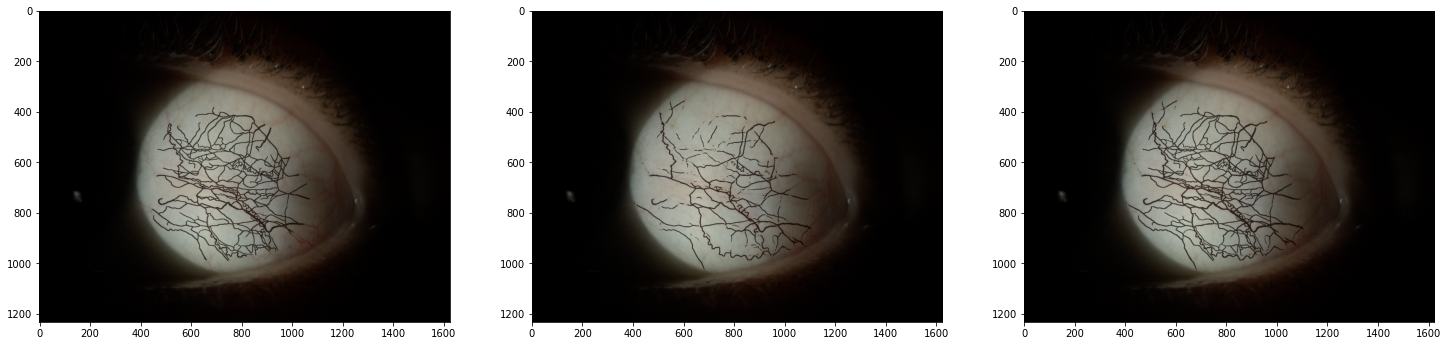

In [ ]:
i = 0
true_image = (dataset[i][0] * 255).type(torch.uint8)
true_mask = (dataset[i][1]).type(torch.bool)
print(orig_paths[i])
name = orig_paths[i].split('/')[-1]
image = np.array(Image.open(f'/content/train/{name}'))
mask = np.array(Image.open(f'/content/train_new/{name}'))

true_masked = draw_segmentation_masks(true_image, masks=true_mask, alpha=0.7)
all_masked = draw_segmentation_masks(
    true_image,
    masks=true_mask | torch.as_tensor(mask), 
    alpha=0.7)

pred_masked = draw_segmentation_masks(torch.tensor(image).permute(2, 0, 1), 
                                      masks=torch.tensor(mask), 
                                      alpha=0.7)

_, axs = plt.subplots(1, 3, figsize=(25, 15))
axs = axs.flatten()

# axs[0].imshow(np.moveaxis(true_image.cpu().numpy(), 0, -1))
axs[0].imshow(np.moveaxis(true_masked.cpu().numpy(), 0, -1))
axs[1].imshow(np.moveaxis(pred_masked.cpu().numpy(), 0, -1))
axs[2].imshow(np.moveaxis(all_masked.cpu().numpy(), 0, -1))

plt.show()

In [ ]:
!rm -rf /content/masks
!mkdir /content/masks

In [ ]:
for i in tqdm(range(len(orig_paths))):
    true_image = (dataset[i][0] * 255).type(torch.uint8)
    true_mask = (dataset[i][1]).type(torch.bool)
    name = orig_paths[i].split('/')[-1]
    image = np.array(Image.open(f'/content/train/{name}'))
    mask = np.asarray(Image.open(f'/content/train_new/{name}'))

    all_mask = torch.tensor(mask | true_mask.numpy())
    # all_mask = torch.clip(true_mask.float() + torch.as_tensor(mask).float(), max=1)
    all_mask = all_mask[0, :, :] * 255
    im = Image.fromarray(all_mask.cpu().numpy().astype(np.uint8), mode='L').convert('1')
    im.save(os.path.join('/content/masks/',name), optimize=True)

100%|██████████| 650/650 [10:13<00:00,  1.06it/s]


In [ ]:
!ls /content/masks | wc -l

650


## Pseudo Labeling - Test

In [16]:
!ls /content/masks | wc -l

951


In [15]:
!cp /content/submit/* /content/masks

In [21]:
!ls /content/train | wc -l

1615


In [20]:
!cp eye_test/* /content/train/

In [ ]:
!rename 's/.png/_mask.png/' /content/submit/*.png
!ls /content/submit

In [ ]:
!cp eye_test/* /content/submit

In [ ]:
!ls /content/submit | wc -l

602


In [ ]:
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset
import glob
import json


class EyeDataset(Dataset):
    """
    Класс датасета, организующий загрузку и получение изображений и соответствующих разметок
    """

    def __init__(self, paths: str, transform = None):
        self.class_ids = {"vessel": 1}

        self.paths = paths
        self.transform = transform

    @staticmethod
    def read_image(path: str) -> np.ndarray:
        image = cv2.imread(str(path), cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = np.array(image / 255, dtype=np.float32)
        return image

    def __getitem__(self, idx: int) -> dict:
        image_path = self.paths[idx]
        mask_path = image_path.split('.')[0] + '_mask.png'

        image = self.read_image(image_path)
        mask = self.read_image(mask_path)

        sample = {'image': image,
                  'mask': mask}

        if self.transform is not None:
            sample = self.transform(**sample)

        image = sample['image']
        mask = sample['mask']

        image = np.transpose(image, (2, 0, 1))
        image = torch.from_numpy(np.array(image, dtype=np.float))
        image = image.type(torch.FloatTensor)
        mask = np.expand_dims(mask[:, :, 0], axis=-1)
        mask = np.transpose(mask, (2, 0, 1))
        mask = torch.from_numpy(np.array(mask, dtype=np.uint8))
        return image, mask

    def __len__(self):
        return len(self.paths)

In [ ]:
sub_paths = [x for x in glob.glob('/content/submit/*.png') if 'mask' not in x]
dataset = EyeDataset(sub_paths)
len(dataset)

301

In [ ]:
dataset[0][0].shape

torch.Size([3, 1232, 1624])

In [ ]:
from modeling import Cutter
import skimage

def is_enough_presentable(image, threshold=0.3):
    """
    Filter image by histogram value
    :param image: image to check
    :param threshold: threshold of filtering [0..1]
    :return: boolean value is image enough presentable or not
    """
    grayscale = skimage.color.rgb2gray(image)

    histogram, bin_edges = np.histogram(grayscale, bins=256, range=(0.0, 1.0))
    
    if np.sum(histogram[30:]) / np.sum(histogram) >= threshold:
        return True
    return False

cutter = Cutter(kernel_size=(512, 512), stride=(512, 512))

for i in tqdm(range(len(sub_paths))):
    img = dataset[i][0].permute(1, 2, 0)
    mask = dataset[i][1]
    mask = torch.unsqueeze(mask, dim=0)
    mask = torch.cat([mask, mask, mask], dim=0)
    mask = mask[:, 0, :, :].permute(1, 2, 0)

    img_num = sub_paths[i].split('/')[-1].split('.')[0]
    img_patches = cutter.split(img)
    mask_patches = cutter.split(mask)

    for idx in range(len(img_patches)):
        np_img = img_patches[idx].permute(1, 2, 0).numpy()
        np_img = np.array(np_img * 255, dtype=np.uint8)
        if is_enough_presentable(np_img, threshold=0.3):
            im = Image.fromarray(np_img)
            im.save(f"/content/train_ext/{img_num}_{idx}.png")

            np_mask = mask_patches[idx].permute(1, 2, 0).numpy() * 255
            msk = Image.fromarray(np_mask)
            msk.save(f"/content/train_ext/{img_num}_{idx}_mask.jpg")

100%|██████████| 301/301 [04:35<00:00,  1.09it/s]


In [ ]:
!ls /content/train_ext/ | wc -l

6526


## Draw segmentation masks

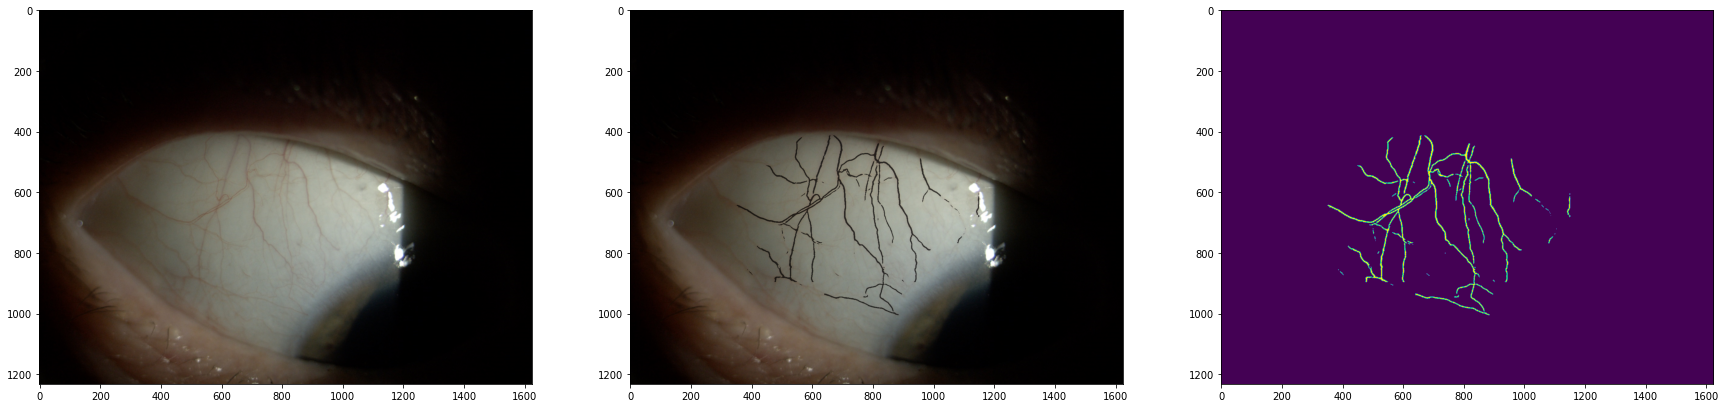

In [ ]:
image = np.array(Image.open('eye_test/837.png'))
mask = np.array(Image.open('/content/submit/837.png'))

image_masked = draw_segmentation_masks(torch.tensor(image).permute(2, 0, 1), masks=torch.tensor(mask), alpha=0.7)

_, axs = plt.subplots(1, 3, figsize=(30, 15))
axs = axs.flatten()
axs[0].imshow(image)
axs[1].imshow(np.moveaxis(image_masked.cpu().numpy(), 0, -1))
axs[2].imshow(mask)
plt.show()

## CV techniques

In [ ]:
import cv2 as cv
import numpy as np
mask = np.array(Image.open('/content/submit/837.png'))
kernel = np.ones((5,5),np.uint8)

opening = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

error: ignored

In [ ]:
image = np.array(Image.open('eye_test/837.png'))

image_masked = draw_segmentation_masks(torch.tensor(image).permute(2, 0, 1), masks=torch.tensor(mask), alpha=0.7)

_, axs = plt.subplots(1, 3, figsize=(20, 10))
axs = axs.flatten()
axs[0].imshow(image)
axs[1].imshow(np.moveaxis(image_masked.cpu().numpy(), 0, -1))
axs[2].imshow(mask)
plt.show()

## Fix submit names

In [ ]:
sample_files = os.listdir('sample_solution/')
submit_files = os.listdir('/content/submit')

remove_files = [x for x in submit_files if x not in sample_files]
add_files = [x for x in sample_files if x not in submit_files]
len(remove_files), len(add_files)

(1, 0)

In [ ]:
for add in add_files:
    shutil.copyfile(os.path.join('sample_solution/', add), os.path.join('/content/submit', add))

for remove in remove_files:
    os.remove(os.path.join('/content/submit', remove))

In [ ]:
!ls /content/submit | wc -l

301


## ZIP submit

In [ ]:
%cd /content/submit
!zip submit.zip *
!du -sh submit.zip
!mv submit.zip /content/128.zip
%cd /content/drive/MyDrive/AI/micro

/content/submit
  adding: 1001.png (deflated 3%)
  adding: 1002.png (deflated 3%)
  adding: 1003.png (deflated 3%)
  adding: 1004.png (deflated 4%)
  adding: 1005.png (deflated 1%)
  adding: 1007.png (deflated 2%)
  adding: 1008.png (deflated 2%)
  adding: 1009.png (deflated 6%)
  adding: 1010.png (deflated 2%)
  adding: 1011.png (deflated 4%)
  adding: 1012.png (deflated 4%)
  adding: 1013.png (deflated 4%)
  adding: 1014.png (deflated 4%)
  adding: 1015.png (deflated 3%)
  adding: 1016.png (deflated 3%)
  adding: 1017.png (deflated 4%)
  adding: 1018.png (deflated 7%)
  adding: 1019.png (deflated 2%)
  adding: 1020.png (deflated 3%)
  adding: 1022.png (deflated 3%)
  adding: 1023.png (deflated 7%)
  adding: 1024.png (deflated 3%)
  adding: 1025.png (deflated 4%)
  adding: 1026.png (deflated 4%)
  adding: 1027.png (deflated 6%)
  adding: 1028.png (deflated 4%)
  adding: 1029.png (deflated 3%)
  adding: 1031.png (deflated 4%)
  adding: 1032.png (deflated 2%)
  adding: 1033.png (deflate

In [ ]:
!ls /content/submit | wc -l

300


In [ ]:
!wget https://lodmedia.hb.bizmrg.com/case_files/815459/test_dataset_mc2.zip -O /content/test_dataset_mc2.zip

--2022-09-13 11:06:56--  https://lodmedia.hb.bizmrg.com/case_files/815459/test_dataset_mc2.zip
Resolving lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)... 217.69.142.100
Connecting to lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)|217.69.142.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 875819220 (835M) [application/zip]
Saving to: ‘/content/test_dataset_mc2.zip’

          /content/   7%[>                   ]  61.90M   583KB/s    eta 23m 25s^C
